## Dataset 2 general information
1. Country: Number of countries in th dataset
2. Year: Number of years
3. Maternal mortality ratio (per 100 000 live births) (in a specific range)	
4. Number of maternal deaths (in a specific range)
> All the information is about maternal death and their ranges per 100000 live births per year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_mat = pd.read_csv("Datasets/Maternal mortality.csv")
data_mat.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]


In [3]:
data_mat.dtypes

Country                                               object
Year                                                   int64
Maternal mortality ratio (per 100 000 live births)    object
Number of maternal deaths                             object
dtype: object

## Data filtering phase

#### The data in the last two columns contain the value with some range values. We only need the original values and not the range values. Thus, we shall remove them.

In [4]:
data_mat.tail()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
3289,Zimbabwe,2004,686 [ 597 - 784 ],2 800 [ 2 400 - 3 100 ]
3290,Zimbabwe,2003,680 [ 590 - 779 ],2 700 [ 2 300 - 3 100 ]
3291,Zimbabwe,2002,666 [ 577 - 766 ],2 600 [ 2 200 - 3 000 ]
3292,Zimbabwe,2001,629 [ 544 - 723 ],2 400 [ 2 100 - 2 800 ]
3293,Zimbabwe,2000,579 [ 500 - 667 ],2 200 [ 1 900 - 2 500 ]


In [5]:
import re 
x = "This is a sentence. (once a day) [twice a day]"
x = re.sub("[\(\[].*?[\)\]]", "", x)

In [6]:
import re
vals = []
length = len(data_mat['Number of maternal deaths'])
for i in range(length):
    x = data_mat['Number of maternal deaths'][i]
    x = re.sub("[\(\[].*?[\)\]]", "", x)
    element = re.sub(" ", "", x)
    vals.append(element)
    


In [7]:
data_mat['maternal_deaths'] = vals

In [8]:
data_mat.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths,maternal_deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ],7700
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ],8100
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ],8400
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ],9300
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ],9600


In [9]:
vals_2 = []
for i in range(length):
    x = data_mat['Maternal mortality ratio (per 100 000 live births)'][i]
    x = re.sub("[\(\[].*?[\)\]]", "", x)
    element = re.sub(" ", "", x)
    vals_2.append(element)

In [10]:
data_mat['mat_mort_ratio'] = vals_2

In [11]:
data_mat.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths,maternal_deaths,mat_mort_ratio
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ],7700,638
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ],8100,673
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ],8400,701
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ],9300,786
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ],9600,810


In [12]:
drop_list = ["Maternal mortality ratio (per 100 000 live births)", "Number of maternal deaths"]
data_mat.drop(drop_list, axis = 1, inplace = True)

In [13]:
data_mat.head()

,Country,Year,maternal_deaths,mat_mort_ratio
0,Afghanistan,2017,7700,638
1,Afghanistan,2016,8100,673
2,Afghanistan,2015,8400,701
3,Afghanistan,2014,9300,786
4,Afghanistan,2013,9600,810


In [14]:
data_mat = data_mat.replace("", "0")

In [15]:
data_mat['maternal_deaths'] = data_mat['maternal_deaths'].astype("int64")

In [16]:
data_mat['mat_mort_ratio'] = data_mat['mat_mort_ratio'].astype("int64")

In [17]:
data_mat.dtypes

Country            object
Year                int64
maternal_deaths     int64
mat_mort_ratio      int64
dtype: object

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'maternal_deaths'}>],
       [<AxesSubplot:title={'center':'mat_mort_ratio'}>, <AxesSubplot:>]],
      dtype=object)

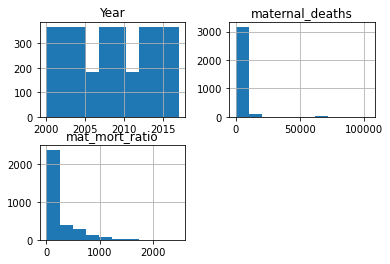

In [18]:
data_mat.hist()

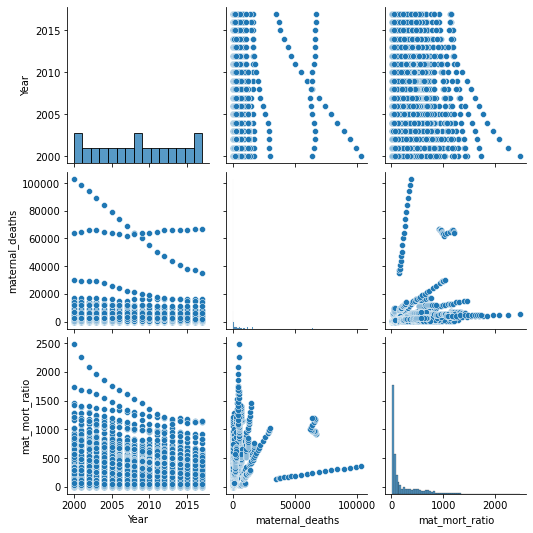

In [19]:
sns.pairplot(data_mat)

In [20]:
data_mat.nunique()

Country            183
Year                18
maternal_deaths    314
mat_mort_ratio     741
dtype: int64

<AxesSubplot:>

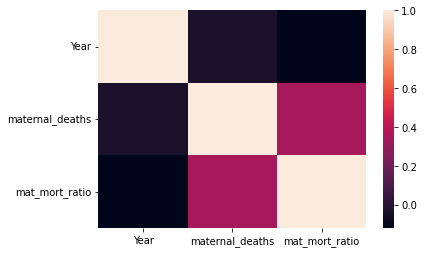

In [21]:
correlation = data_mat.corr()
sns.heatmap(correlation)

In [22]:
from pandas_profiling import ProfileReport

In [23]:
Maternal_mortal_report = ProfileReport(
    data_mat,
    title="Maternal Morality EDA report"         
)
Maternal_mortal_report.to_notebook_iframe()

In [39]:
Maternal_mortal_report.to_file("Maternal Morality EDA report.html")

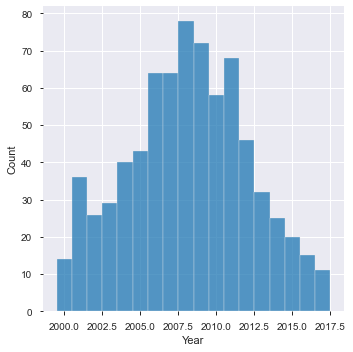

In [24]:
sns.displot(data_mat.groupby(['mat_mort_ratio'])['Year'].mean(), discrete = True)

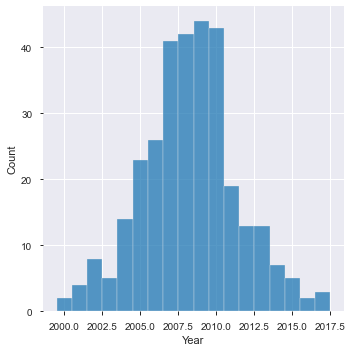

In [25]:
sns.displot(data_mat.groupby(['maternal_deaths'])['Year'].mean(), discrete = True)

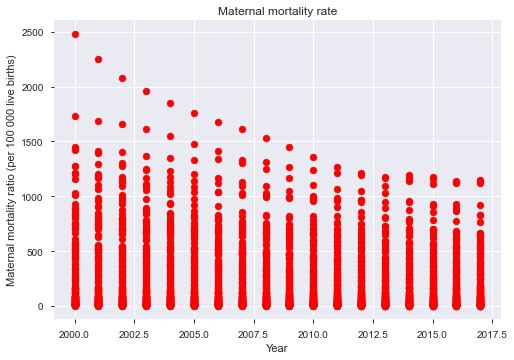

In [26]:
plt.title("Maternal mortality rate")
plt.xlabel("Year")
plt.ylabel("Maternal mortality ratio (per 100 000 live births)")
plt.scatter(data_mat['Year'], data_mat['mat_mort_ratio'], color = "red")
plt.show()

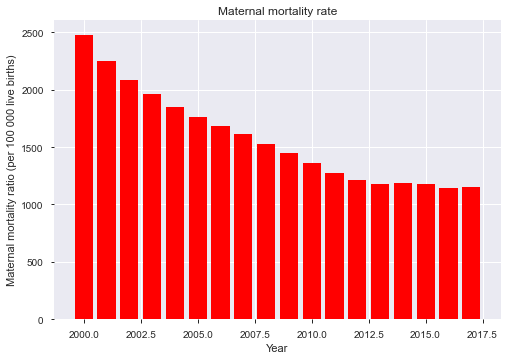

In [27]:
plt.title("Maternal mortality rate")
plt.xlabel("Year")
plt.ylabel("Maternal mortality ratio (per 100 000 live births)")
plt.bar(data_mat['Year'], data_mat['mat_mort_ratio'], color = "red")
plt.show()

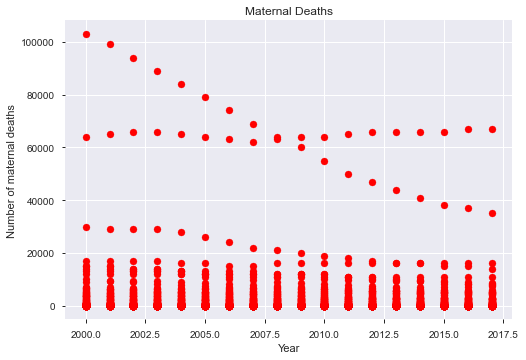

In [28]:
plt.title("Maternal Deaths")
plt.xlabel("Year")
plt.ylabel("Number of maternal deaths")
plt.scatter(data_mat['Year'], data_mat['maternal_deaths'], color = 'red')
plt.show()

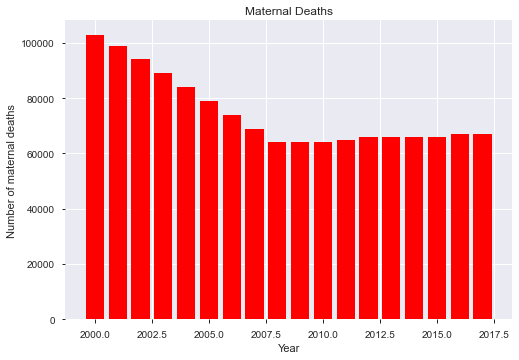

In [29]:
plt.title("Maternal Deaths")
plt.xlabel("Year")
plt.ylabel("Number of maternal deaths")
plt.bar(data_mat['Year'], data_mat['maternal_deaths'], color = 'red')
plt.show()

In [30]:
categorical = [col for col in data_mat.columns if data_mat[col].dtype == 'O']

In [31]:
countries = data_mat[categorical]


In [32]:
countries = pd.get_dummies(countries, drop_first = True)

In [33]:
countries.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data_mat.drop('Country', axis = 1, inplace = True)

In [35]:
datalist = [countries, data_mat]

In [36]:
new_data = pd.concat(datalist, axis = 1)
new_data

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year,maternal_deaths,mat_mort_ratio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,7700,638
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2016,8100,673
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2015,8400,701
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2014,9300,786
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2013,9600,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2004,2800,686
3290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2003,2700,680
3291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2002,2600,666
3292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2001,2400,629


In [37]:
def plot_outliers(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

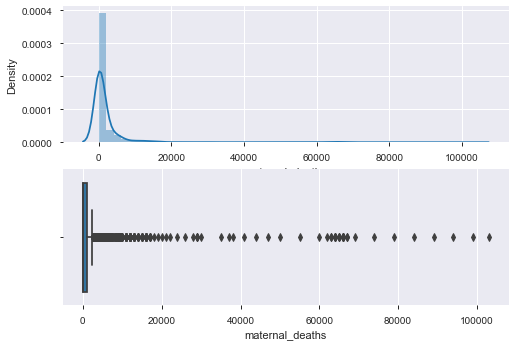

In [41]:
plot_outliers(data_mat, "maternal_deaths")

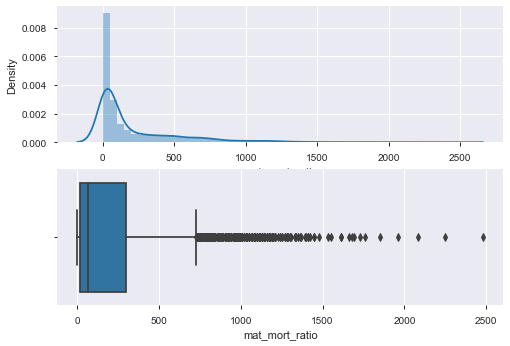

In [44]:
plot_outliers(data_mat, "mat_mort_ratio")

In [45]:
data_mat['maternal_deaths'] = np.where(data_mat['maternal_deaths'] >= 20000, data_mat['maternal_deaths'].median(), data_mat['maternal_deaths'])

In [46]:
data_mat['mat_mort_ratio'] = np.where(data_mat['mat_mort_ratio'] >= 1500, data_mat['mat_mort_ratio'].median(), data_mat['mat_mort_ratio'])

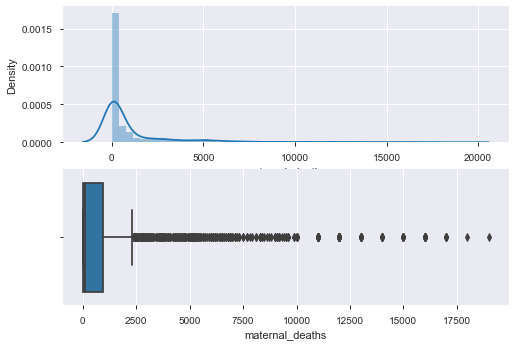

In [47]:
plot_outliers(data_mat, 'maternal_deaths')

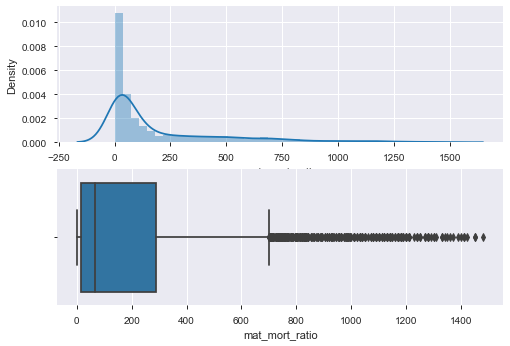

In [48]:
plot_outliers(data_mat, 'mat_mort_ratio')

In [49]:
x = new_data.drop(['mat_mort_ratio', 'maternal_deaths'], axis = 1)
x.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013


In [50]:
x.shape

(3294, 183)

In [51]:
y1 = data_mat['mat_mort_ratio']
y1

0       638.0
1       673.0
2       701.0
3       786.0
4       810.0
        ...  
3289    686.0
3290    680.0
3291    666.0
3292    629.0
3293    579.0
Name: mat_mort_ratio, Length: 3294, dtype: float64

In [52]:
y2 = data_mat['maternal_deaths']
y2

0       7700.0
1       8100.0
2       8400.0
3       9300.0
4       9600.0
         ...  
3289    2800.0
3290    2700.0
3291    2600.0
3292    2400.0
3293    2200.0
Name: maternal_deaths, Length: 3294, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2)

In [55]:
from sklearn import metrics
import pickle

In [56]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Implementing Regression models on maternal mortality ratio

Training score : 0.9186693165923846
predictions are: 
 [-2.41165748e+01  9.21060973e+01  2.53326973e+01  3.85915962e+02
  1.83390535e+01 -1.81389092e+01  2.84742184e+01 -3.29756561e+01
  3.26410486e+01  5.01774070e+02  3.78470544e+02 -4.78698780e+01
  9.02472426e+00 -1.91382283e+01  1.01906758e+02  3.33587549e+01
  5.81028098e+01  6.83348991e+01  6.01676981e+02  1.94865426e+02
  1.17525782e+01  2.90719061e+01  3.43618025e+02  2.45905632e+01
 -3.67221178e+01 -2.86198590e+01  5.03183983e+02  2.52050145e+02
  6.30134920e+01  7.70787831e+01 -2.53420989e+00  8.13269148e+01
  4.56177899e+02  1.10474888e+03  3.47992534e+01  3.05808707e+02
  1.42844457e+01  2.98621985e+02  4.20050219e+01  8.67448869e+01
  3.60339665e+02  1.67912302e+01  2.65178704e+02  2.78487854e+01
  1.48176677e+02  5.66826228e+01  4.28308498e+02  1.04901008e+03
 -9.29266026e+00  8.39664364e+02  1.17301538e+01 -2.33940272e+01
  1.89041213e+02  5.24590385e+01  3.04069141e+02  3.27567032e+02
  6.36766899e+01  6.98171850e+02  1

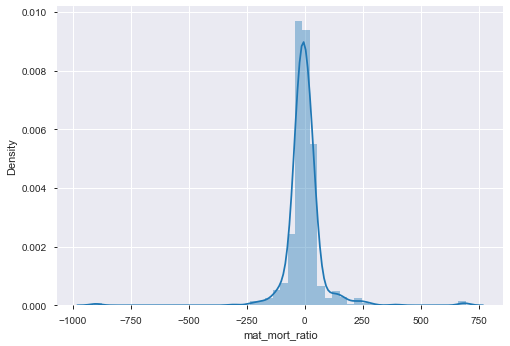

In [59]:
predict(LinearRegression(), 0)

Training score : 0.36582899876762853
predictions are: 
 [ 80.  417.  294.4 230.4 278.6 226.6 262.8 292.  162.4 338.6 429.6 136.
 152.8 155.6 321.  240.2 247.  328.8 365.4 255.6  92.6 256.6 346.6 343.2
 199.2 211.  449.6 588.8 153.4 418.2 213.4 473.6 479.8 768.2 469.8 336.2
 218.2 320.8 265.8 386.2 678.6 314.  347.  384.2 262.2 250.  458.6 367.8
 254.2 577.2 236.8 192.4 349.8 541.6 351.2 351.6 278.  338.8 421.2 253.6
 328.  196.6 192.6 148.  178.8 320.4 363.2 426.  264.4 239.  283.8 247.8
 295.  312.2 304.6 654.  566.8 581.  400.2 155.8 304.6 235.2 255.  288.2
 414.2 328.8 314.6 204.  348.2 616.  178.   78.8 278.4 538.2 435.  295.6
 294.6 485.8 726.2 234.4 268.2 521.2 514.  265.4 343.4  14.8 274.2 245.8
 220.4 214.  824.6 521.6 410.  679.4 132.8 526.2 747.4 661.6 394.8 590.4
  91.2 399.  629.6 183.  303.  215.4 350.2 698.  166.6 206.8 105.4 309.2
 547.6 485.2 158.  414.4 470.8 482.4 270.8  67.6 407.4 274.4 155.  227.8
 235.8 393.6 271.8 362.6 447.  200.6 209.  218.8 398.  633.6 210.6 24

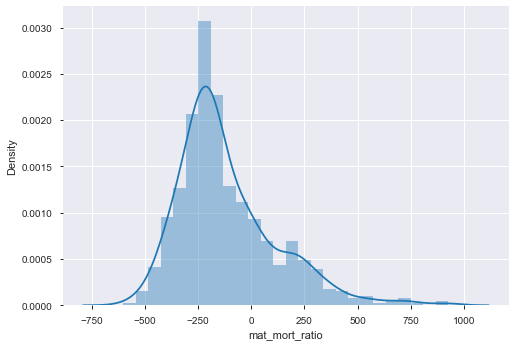

In [60]:
predict(KNeighborsRegressor(), 0)

Training score : 1.0
predictions are: 
 [   8.   53.   36.  369.    5.   16.   15.    8.   54.  413.  423.    3.
   39.   30.   65.   19.   34.   37.  589.  161.   11.    5.  242.    5.
    3.    5. 1180.  275.   28.   55.   27.   77.  473. 1280. 1030.  303.
  810.  346.   10.   49.  507. 1030.  256.    6.  122.  954.  422.  963.
    6.  836.   53.    5.  167.    3.  314.  320.   41.  558.  147.  557.
 1030.   30.  810.    7.   63.  158.  444.   73.    7.   59.   17.   13.
   78.   42.   38. 1040.  745.  878.  231.  173. 1030.   45.  223.   48.
  762.   64.   70.   46.   30.  803.   28.    5.  621.  943.   10.   78.
  292.   65.  994.  160.    8.   76.   15.   64.  490.   26.    5.  185.
  331.   68. 1180.   10.  297.  702.    5.  225. 1300.  988.   32.  760.
   30.   51.  834.   30.    5.    9.   24.  704.  161.   13.   26.  387.
   53.  505.   28.   33.   10.  117.   41.   78.    7.   10.    4.    3.
    6.    5.   43.  297.   25.    4.    4.  786.  412.  467.  441.   28.
   12.    6

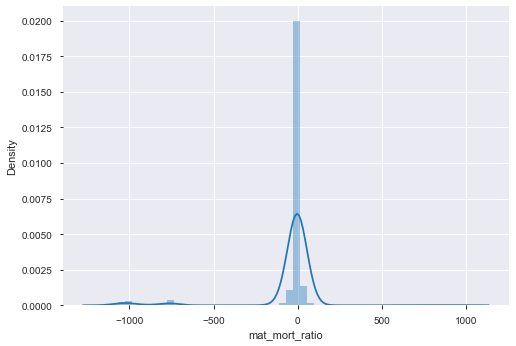

In [61]:
predict(DecisionTreeRegressor(), 1)

### Implementing classifier models on mortality ratio 

Training score : 0.3400379506641366
predictions are: 
 [  8.   7.  33.  10.   5.  10.  13.   8.   6.  20.   3.   2.   3.  10.
  12.   9.   6.  37.   4.  10.  13.   5.   9.   5.   3.   5.  30.  53.
  17.  53.  27.  76.  48.  41.  11.  84.   4.  16.   9.  12. 348.   4.
  12.   6.   7.   5.  60.   8.   6.   5.   3.   5.   5.   3.   6.  30.
   6.   8.   7.   5.   6.  12.  29.   4.   8.  66.  12.  54.   5.   8.
  17.   9.   6.  36.  38.  16.  12.   5.  36.  40.   6.   3.  27.   6.
  22.  54.  25.  10.  27.  20.   4.   5.  10.  17.  10.  34.  10.  59.
  27.   3.   8.   7.  15.   9.   8.   4.   6.  17.  10.   6.  42.   7.
  11.  29.   3.   5.  12.   6.  29.  20.  10.  38.  13.  12.   4.   9.
  24.  54.   8.  12.  32.   3.  13. 116.  28.  14.  10. 116.   7.   4.
   7.  10.   4.   3.   6.  43.   5.   6.  25.   4.   3.  10.  30. 467.
  17.  38.  12.   5.  30.  10.  17.  13.   5.   4. 191.   3.  10.   6.
   5.  34.   5.  35.   6.   5.  10.  10.   6.  32.   8.   7.  15.   5.
   9.  79.  12.  11.  

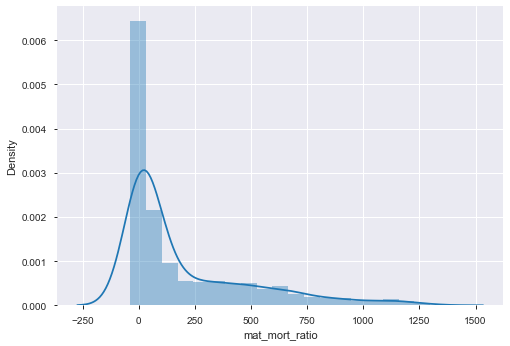

In [62]:
predict(KNeighborsClassifier(), 0)

In [63]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 1.0
predictions are: 
 [   8.   53.   36.  331.    5.   16.   15.    8.   54.  810.  423.    3.
   41.   17.   65.   19.   34.   37.  185.  161.   13.    5.  242.    5.
    3.    5. 1180.  275.  185.   55.   31.   77.  473. 1280.   28. 1030.
   38.  346.   10.   49.  507.    4.  185.    6. 1140.  954.  422.  912.
    6.  836.   53.    5.  167.    3.  905.  786.   41.  638.  147.  185.
    6.  673.   39.    7.   63.  158.  905.   73.    7.  638.   17.   13.
   77.   42.   40. 1030.  745.  878.  231.  173.    7.   45.  810.   45.
  185.   64.  472.   46.   29.  803.  185.    5.  621.  878.   10.   76.
  905.   65.  954.  189.    8.   76.   15.   64.  490.   19.    5.  810.
  331.   68. 1110.   10. 1450.  676.    5.  225. 1300.  972.   32.  760.
  673.  905.  834.   24.    5.    9.   24.  704.  638.   13.   40.  387.
   53.  439.   28.   33.   10.  116.   41.   78.    7.   10.    4.    3.
    6.    5.   43. 1390.   25.    4.    4.   46.  905.  467.  185.   38.
   12.    6

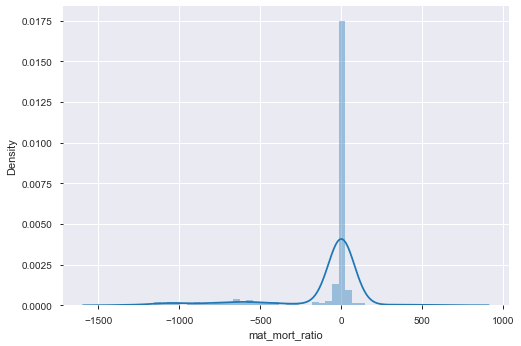

In [64]:
predict(DecisionTreeClassifier(), 1)

## Conclusion:
### Thus while implementing the models, we have derieved the following insights:
#### 1. The KNeighbors Classifier model's evaluation metrics are <u>very much irrelevant</u> as compared to other models.
#### 2. The DecisionTree Regressor is the best fit model as the <u>*evaluation metrics and training score is excellent.*</u>
#### 3. Distribution plot also derieves the stability of each model. 
#### 4. From the predictions we can conclude that Maternal Mortality Ratio is getting low as compared to previous times. This is a good result